<a href="https://colab.research.google.com/github/eunzzae/Study_NLP/blob/main/231123_%EC%8B%A4%EC%8A%B5(1)_%5BChapter_4_1%5D_%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9_%EA%B5%AC%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한국어 워드 임베딩 구축

## Introduction
**Chapter 4. 단어 임베딩 만들기** 강의의 첫 번째 실습 강의인 **한국어 워드 임베딩 구축** 강의입니다.

강의에서 배웠던 단어 임베딩의 대표적인 방법인 Word2Vec을 활용하여 영어와 한국어 워드 임베딩을 직접 구축해보고 임베딩의 품질을 평가합니다.

## 1. 영어 워드 임베딩 구축

한국어 워드 임베딩을 만들기 전에 영어 워드 임베딩을 구축하며 임베딩 구축에 대한 감을 익혀봅시다.

간단한 실습을 위해, scikit-learn 패키지에서 제공하는 20 newsgroup를 활용합니다.

In [112]:
import pandas as pd
import numpy as np

In [113]:
from sklearn.datasets import fetch_20newsgroups

In [114]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
dataset = dataset.data

In [115]:
dataset[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [116]:
print(f"데이터셋 총 개수 : {len(dataset)}")

데이터셋 총 개수 : 11314


In [117]:
news_df = pd.DataFrame({'document':dataset})
news_df

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


sklearn 패키지의 datasets 메소드에서 가져온 fetch_20newgroups 데이터셋의 총 개수는 11,314개입니다.

### 1.1. 데이터셋 전처리

데이터셋의 전처리를 진행할수록 워드 임베딩의 성능이 향상될 것이므로, 불필요한 토큰을 제거하고, 소문자화를 통한 정규화와 같은 간단한 전처리 작업을 진행합니다.

In [118]:
# 먼저 데이터셋 내에 결측값이 있는지 확인합니다
news_df.replace("", float("NaN"), inplace=True)
print(news_df.isnull().values.any())

True


In [119]:
news_df = news_df.dropna().reset_index(drop=True)
print(f"필터링된 데이터셋 총 개수 : {len(news_df)}")

필터링된 데이터셋 총 개수 : 11096


In [120]:
news_df

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11091,"Danny Rubenstein, an Israeli journalist, will ..."
11092,\n
11093,\nI agree. Home runs off Clemens are always m...
11094,I used HP DeskJet with Orange Micros Grappler ...


In [121]:
# 열을 기준으로 중복제거
processed_news_df = news_df.drop_duplicates(['document']).reset_index(drop=True)
processed_news_df

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
10988,My sunroof leaks. I've always thought those t...
10989,"Danny Rubenstein, an Israeli journalist, will ..."
10990,\nI agree. Home runs off Clemens are always m...
10991,I used HP DeskJet with Orange Micros Grappler ...


In [122]:
processed_news_df.iloc[0][0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [123]:
len(processed_news_df.iloc[0][0])

852

In [124]:
# 데이터셋 내 특수 문자를 제거합니다.
processed_news_df['document'] = processed_news_df['document'].str.replace("[^a-zA-Z]", " ")
processed_news_df

<ipython-input-124-dc15be009c2a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_news_df['document'] = processed_news_df['document'].str.replace("[^a-zA-Z]", " ")


,document
0,Well i m not sure about the story nad it did s...
1,Yeah do you expect people to read the ...
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,Well I will have to change the scoring on my ...
...,...
10988,My sunroof leaks I ve always thought those t...
10989,Danny Rubenstein an Israeli journalist will ...
10990,I agree Home runs off Clemens are always me...
10991,I used HP DeskJet with Orange Micros Grappler ...


In [125]:
  # 문서 내 길이가 너무 짧은 단어를 제거합니다. (단어의 길이가 2 이하)
processed_news_df['document'] = processed_news_df['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
processed_news_df

,document
0,Well not sure about the story nad did seem bia...
1,Yeah you expect people read the FAQ etc and ac...
2,Although realize that principle not one your s...
3,Notwithstanding all the legitimate fuss about ...
4,Well will have change the scoring playoff pool...
...,...
10988,sunroof leaks always thought those things were...
10989,Danny Rubenstein Israeli journalist will speak...
10990,agree Home runs off Clemens are always memorab...
10991,used DeskJet with Orange Micros Grappler Syste...


In [126]:
# 전체 길이가 200 이하이거나 전체 단어 개수가 5개 이하인 데이터를 필터링합니다.
processed_news_df = processed_news_df[processed_news_df.document.apply(lambda x: len(str(x)) <= 200 and len(str(x).split()) > 5)].reset_index(drop=True)
processed_news_df

,document
0,Diet Evangelist Good term Fits Atkins Gordon B...
1,The title says all need know the and rom versions
2,Can move the political bickering more appropri...
3,Texas Well Corpus Christi anyway you pick the ...
4,Yes the coast over Portland then Really nice m...
...,...
2580,there there anybody who know polygon reduction...
2581,Mark Juric Programs mjuric uga edu University ...
2582,sunroof leaks always thought those things were...
2583,Danny Rubenstein Israeli journalist will speak...


In [127]:
# 전체 단어에 대한 소문자 변환 (정규화)
processed_news_df['document'] = processed_news_df['document'].apply(lambda x: x.lower())
processed_news_df

,document
0,diet evangelist good term fits atkins gordon b...
1,the title says all need know the and rom versions
2,can move the political bickering more appropri...
3,texas well corpus christi anyway you pick the ...
4,yes the coast over portland then really nice m...
...,...
2580,there there anybody who know polygon reduction...
2581,mark juric programs mjuric uga edu university ...
2582,sunroof leaks always thought those things were...
2583,danny rubenstein israeli journalist will speak...


In [128]:
import nltk
from nltk.corpus import stopwords

In [129]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
stop_words = stopwords.words('english')

print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [131]:
# 데이터들의 불용어를 제외하여 띄어쓰기 단위로 문장을 분리합니다.
tokenized_doc = processed_news_df['document'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in stop_words])
tokenized_doc

0       [diet, evangelist, good, term, fits, atkins, g...
1                [title, says, need, know, rom, versions]
2       [move, political, bickering, appropriate, grou...
3       [texas, well, corpus, christi, anyway, pick, p...
4       [yes, coast, portland, really, nice, way, sure...
                              ...                        
2580    [anybody, know, polygon, reduction, algorithm,...
2581    [mark, juric, programs, mjuric, uga, edu, univ...
2582    [sunroof, leaks, always, thought, things, roya...
2583    [danny, rubenstein, israeli, journalist, speak...
2584    [agree, home, runs, clemens, always, memorable...
Name: document, Length: 2585, dtype: object

In [132]:
tokenized_doc = tokenized_doc.to_list()
print(len(tokenized_doc))

2585


### 1.2. 영어 워드 임베딩 구축을 위한 단어 토큰화

이번 실습에서는 Word2Vec의 skip-gram 방법을 사용하여 워드 임베딩을 구축합니다.

Word2Vec의 Skip-gram을 사용하려면 데이터에 2개 이상의 단어가 있어야 합니다.

그래야만 중심 단어, 주변 단어의 관계가 성립하며 그렇지 않으면 샘플을 구성할 수 없어 에러가 발생합니다.

추가적인 전처리 과정에서 이를 만족하지 않는 샘플들을 제거해야 합니다.

In [133]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [134]:
print(len(tokenized_doc))

2585


In [135]:
print(f"최종 학습 데이터셋 수 : {len(tokenized_doc)}")

최종 학습 데이터셋 수 : 2585


단어 집합을 생성하고, 단어 토큰화(정수 인코딩)를 진행합니다.

In [136]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [137]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [138]:
word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

생성된 단어 사전의 크기를 확인합니다.

In [139]:
vocab_size = len(word2idx) + 1
print(f"단어 사전의 크기 : {vocab_size}")

단어 사전의 크기 : 9519


In [140]:
print(encoded[0])

[1927, 4113, 14, 1928, 1220, 4114, 742, 859, 1010, 1011, 1012, 1013, 1014, 743, 1015, 860, 10, 861, 666, 265]


### 1.3. Word2Vec과 네거티브 샘플링을 활용한 데이터셋 구축

이전 강의에서 학습한대로, 간단한 정제(cleaning), 정규화(normalization), 토큰화(tokenization) 과정의 전처리 과정을 간단히 실습해봤습니다.

이제 Word2Vec 모델에 네거티브 샘플링을 활용할 수 있도록 데이터셋을 구성해보겠습니다.

네거티브 샘플링을 위해서 keras에서 제공하는 전처리 도구인 skipgrams를 사용합니다.

In [141]:
from tensorflow.keras.preprocessing.sequence import skipgrams

모든 데이터셋에 대해 임베딩 구축을 시도하기에 앞서, 일부 데이터만 사용하여 작업이 잘 진행되는지에 대해서 확인해보겠습니다.

In [142]:
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
print(f"전체 샘플 수 : {len(skip_grams)}")

전체 샘플 수 : 5


In [143]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]

In [144]:
print(f"first 3 pairs: {pairs[:3]}")
print(f"first 3 labels: {labels[:3]}")

first 3 pairs: [[742, 977], [265, 861], [860, 9064]]
first 3 labels: [0, 1, 0]


In [145]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

580
580


아래 예시처럼 윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우(**positive sample**)에는 1의 레이블을 갖도록 하고, 그렇지 않은 경우(**negative sample**)는 0의 레이블을 가지도록 하여 데이터셋을 구성합니다.

이 과정은 각각의 데이터에 대해서 동일한 프로세스로 작동합니다..

In [146]:
for i in range(5):
  print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
    idx2word[pairs[i][0]], pairs[i][0],
    idx2word[pairs[i][1]], pairs[i][1],
    labels[i])
  )

(gordon (742), learn (977)) -> 0
(soon (265), shameful (861)) -> 1
(pitt (860), arrl (9064)) -> 0
(atkins (4114), gordon (742)) -> 1
(shameful (861), contouring (6202)) -> 0


예시가 잘 생성됨을 확인했으니, 해당 작업을 더 많음 뉴스그룹 샘플에 대해서 수행합니다.

(학습 데이터셋의 규모가 크므로, 1000개 데이터로만 학습합니다)

In [147]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:1000]]

In [148]:
print(len(training_dataset))

1000


### 1.4. Skip-Gram with Negative Sampling(SGNS)으로 워드 임베딩 구축

In [149]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

임베딩 벡터의 차원은 100으로 정하고, 두 개의 임베딩 층을 추가

In [150]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

각각의 임베딩 행렬은 중심 단어와 주변 단어를 위한 임베딩 행렬입니다.

데이터셋 내 각각의 단어가 임베딩 행렬을 거쳐서 나온 벡터를 활용하여 두 단어 벡터 간 내적을 계산합니다.

내적 값의 결과는 1 또는 0을 예측해야 하므로 시그모이드 함수를 활성화 함수로 거쳐 최종 예측값을 얻습니다.

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 100)               951900    ['input_5[0][0]']             
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 100)               951900    ['input_6[0][0]']             
                                                                                            

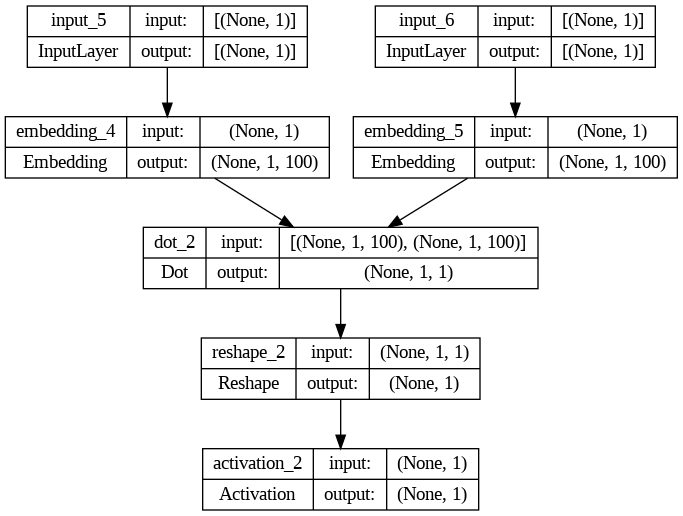

In [151]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

모델 학습은 3 에폭만 진행할게요!

In [152]:
for epoch in range(10):
  loss = 0
  for _, elem in enumerate(skip_grams):
    first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
    second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
    labels = np.array(elem[1], dtype='int32')
    X = [first_elem, second_elem]
    Y = labels
    loss += model.train_on_batch(X,Y)
  print('Epoch :',epoch + 1, 'Loss :',loss)

Epoch : 1 Loss : 3.464365780353546
Epoch : 2 Loss : 3.4523902535438538
Epoch : 3 Loss : 3.4407450556755066
Epoch : 4 Loss : 3.4283074736595154
Epoch : 5 Loss : 3.4145820140838623
Epoch : 6 Loss : 3.399145781993866
Epoch : 7 Loss : 3.3816250562667847
Epoch : 8 Loss : 3.3616908192634583
Epoch : 9 Loss : 3.3390532732009888
Epoch : 10 Loss : 3.3134595155715942


### 1.5. 임베딩 품질 확인

우리는 학습된 모델의 결과를 확인해볼 수 있습니다.

학습된 임베딩 벡터들을 vector.txt에 저장하고, 이를 gensim의 models.KeyedVectors.load_word2vec_format()으로 로드하면 단어 벡터 간 유사도를 구할 수 있습니다!

In [153]:
import gensim

In [154]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [155]:
# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [156]:
w2v.most_similar(positive=['apple'])

[('bon', 0.3573715090751648),
 ('missionary', 0.3303163945674896),
 ('waldbronn', 0.33018502593040466),
 ('packer', 0.32543835043907166),
 ('bank', 0.31737712025642395),
 ('messed', 0.3167651295661926),
 ('unca', 0.31631991267204285),
 ('senses', 0.3088538944721222),
 ('bake', 0.3080796003341675),
 ('duc', 0.3054690957069397)]

In [157]:
w2v.most_similar(positive=['doctor'])

[('chipsets', 0.34867292642593384),
 ('irony', 0.3472476303577423),
 ('hou', 0.3469747304916382),
 ('directions', 0.3378784656524658),
 ('wager', 0.3273022472858429),
 ('frampton', 0.3228105306625366),
 ('wheels', 0.32244542241096497),
 ('virus', 0.31396451592445374),
 ('temporarily', 0.30777087807655334),
 ('unfortunately', 0.30369502305984497)]

In [158]:
w2v.most_similar(positive=['engine'])

[('problems', 0.37451308965682983),
 ('orbiter', 0.34837624430656433),
 ('dana', 0.34633806347846985),
 ('charles', 0.34472954273223877),
 ('attest', 0.33146753907203674),
 ('cmich', 0.33009156584739685),
 ('switch', 0.32905447483062744),
 ('pickup', 0.32457149028778076),
 ('diferent', 0.3240717053413391),
 ('blacks', 0.3219657242298126)]

## 2. 한국어 워드 임베딩 구축

위에서 실습한 내용을 바탕으로 한국어 워드 임베딩을 구축해봅시다!

### 2.1. 데이터셋 수집

이번에는 AI Hub에 공개되어있는 한국어 도서 요약 데이터셋을 활용해볼게요!

전처리가 완료된 데이터셋은 [링크](https://drive.google.com/file/d/1SBKsb9hy9vmOm5Cfi0GDOrpm-_kqXOyS/view?usp=share_link)에서 받으실 수 있으며,

해당 데이터셋에 대한 이용 약관은 [여기](https://www.aihub.or.kr/useStplat.do?currMenu=110&topMenu=110)에서 확인할 수 있습니다.

해당 파일의 용량이 매우 크므로, 이번 강의에서는 위 데이터셋의 일부를 발췌한 데이터셋을 사용할게요.

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import os

data = open('/content/korean_word_embedding.txt/modi_output.txt', 'r', encoding='utf-8')
lines = data.readlines()
passages = []
summaries = []

for line in lines:
    line = line.strip()
    if len(line.split('\t')) < 2:
        print(line)
        break
    passages.append('<s>' + line.split('\t')[0] + '</s>')
    summaries.append('<s>' + line.split('\t')[1] + '</s>')

data.close()

In [162]:
print("passages:", passages[0])
print("summaries:", summaries[0])

passages: <s>자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 생각을 명료하게 정리하는 것이 명확한 글쓰기의 시작이다. 존 케네스 갈브레이드(John Kenneth Galbraith) 교수는 “아무리 복잡하고 어려운 주제라고 명쾌한 언어로 설명이 가능하다. 하지만 필자가 그 주제에 대해 완전히 이해하지 못하면 절대로 명확하게 쓸 수 없다.”고 했다. 명료한 글은 명료한 생각에서 나온다. 그렇지만 글을 고치다보면 생각도 명료하게 된다. 명료하게 쓰려면 내용을 단순화해야 한다. 많은 것을 전달하려는 욕심을 버리고 한두가지로 선택하고 거기 집중해야 한다. 앞에서 이야기한 간결성은 명확성에 도움이 된다. 명료함은 복잡한 설득기법을 사용하는 것보다 더 중요하다. 판사는 이해할 수 없는 사실관계 진술로는 설득되지 않는다. 설득기법이 명료함을 해치는 때에는 그 기법을 사용하지 않는다.</s>
summaries: <s>주제가 아무리 복잡하고 어려울 지라도 필자가 주제에 대해 완벽하게 이해하고 있다면 명확한 글쓰기는 당연 가능하다. 명확한 글쓰기를 할 때 가장 중요한 점은 내용의 단순화 및 간결성이고 많은 것을 전달하려는 욕심을 버리는 것이다.</s>


In [163]:
summary_dataset = passages + summaries

전처리가 완료된 데이터셋이므로, 바로 사용할 수 있습니다.

In [164]:
kor_tokenized_doc = [text.split() for text in summary_dataset]
print(len(kor_tokenized_doc))

320004


### 2.2. 한국어 워드 임베딩 구축을 위한 단어 토큰화

In [165]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [166]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(kor_tokenized_doc)

In [167]:
word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(kor_tokenized_doc)

생성된 단어 사전의 크기를 확인합니다.

In [168]:
vocab_size = len(word2idx) + 1
print(f"단어 사전의 크기 : {vocab_size}")

단어 사전의 크기 : 2092799


In [169]:
print(encoded[0])

[39692, 2273, 77967, 5041, 1838, 28816, 84938, 114, 659, 37, 2273, 20695, 13676, 22, 1225, 65050, 81301, 8328, 232269, 770927, 232270, 770928, 4577, 232271, 6526, 247, 135545, 93422, 9311, 5361, 723, 101, 15978, 7, 4853, 38, 1346, 9085, 6606, 21269, 1513, 5698, 1, 28451, 327, 36014, 7151, 36014, 31630, 10927, 3208, 5244, 770929, 28816, 20695, 102, 20695, 232272, 212, 343207, 18, 52, 40, 98407, 54603, 15053, 462892, 9236, 93423, 15142, 18, 1504, 47356, 770930, 117233, 494, 102, 275625, 1273, 770931, 597, 3431, 30, 512, 14199, 1234, 1, 77, 27847, 201885, 275626, 396, 770932, 343208, 22475, 1072, 7, 4447, 4223, 1779]


### 2.3. Word2Vec과 네거티브 샘플링을 활용한 데이터셋 구축

앞선 실습에서처럼 Word2Vec 모델에 네거티브 샘플링을 활용할 수 있도록 데이터셋을 구성해보겠습니다.

In [170]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [171]:
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
print(f"전체 샘플 수 : {len(skip_grams)}")

전체 샘플 수 : 5


In [172]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]

In [173]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

3780
3780


In [174]:
for i in range(5):
  print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
    idx2word[pairs[i][0]], pairs[i][0],
    idx2word[pairs[i][1]], pairs[i][1],
    labels[i])
  )

(이해하지 (9085), 자국내에서 (461334)) -> 0
(없는 (77), 때에는 (1072)) -> 1
(선택하고 (9236), 전달하려는 (98407)) -> 1
(설득기법을 (770931), 전향을 (200512)) -> 0
(kenneth (232270), 명쾌한 (93422)) -> 1


확인이 끝났으니 데이터셋을 구축합니다.

In [1]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

NameError: ignored

### 2.4. Skip-Gram with Negative Sampling(SGNS)으로 워드 임베딩 구축

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

In [ ]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
for epoch in range(10):
  loss = 0
  for _, elem in enumerate(skip_grams):
    first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
    second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
    labels = np.array(elem[1], dtype='int32')
    X = [first_elem, second_elem]
    Y = labels
    loss += model.train_on_batch(X,Y)
  print('Epoch :',epoch + 1, 'Loss :',loss)

### 2.5. 임베딩 품질 확인

In [ ]:
f = open('kor_vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./kor_vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['주제'])

In [ ]:
w2v.most_similar(positive=['명쾌한'])